In [35]:
from numpy import sin, exp, pi, log
import matplotlib.pyplot as plt
import cmath
%matplotlib inline

# Numerical Integration

Let us implement the trapezoidal and the Simpson’s quadrature rules to numerically compute an integral.

### Trapezoidal

In [1]:
def trapezoidal (f,a, b, n):
    h = (b - a)/float(n)
    s = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        s = s + f(a + i * h)
    return h*s  

### Simpson’s quadrature

In [2]:
def simpson(f,a,b,n):
    h = (b - a)/float(n)
    s0 = f(a) + f(b)
    s1 = 0
    for i in range(1, n//2-1):
        s1 = s1 + f(a + 2*i*h)
    s2 = 0
    for i in range(1, n//2):
        s2 = s2 + f(a + (2*i - 1)*h)
    s = h/3*(s0 + 4*s1 + 2*s2)
    return s

### Definitive Example

Consider the following function for which we have $\int_{-\infty}^{\infty} g(x)dx=\pi$.
<!---
\begin{equation}
\begin{equation}
f(x)=
\begin{cases}
\frac{sin(x)}{x}, & \text{if} \, x \neq 0\\
1, & \text{if} \, x=0
\end{cases}
\end{equation}
--->
\begin{gather*}
    g(x) =
    \begin{cases}
        \frac{\sin{(x)}}{x}, & \quad \text{for} \, x \neq 0, \\
        1, & \quad \text{for} \, x = 0.
    \end{cases}
\end{gather*}

In [3]:
def g(x):
    if x==0:
        return 1
    else:
        return (sin (x))/x    

We can calculate this definitive integral using the approximation methods above. Note that to approximate an indefinite integral we can use a large interval $[-a, a]$ and equidistant nodes $\{ x_n\}_{n=0}^N, x_n=-a+n\frac{2a}{N}$

In [13]:
Trap = trapezoidal(g, -1e6, 1e6, 1000000)
print(Trap)
Simp = simpson(g, -1e6, 1e6, 1000000)
print(Simp)

3.1415914506276046
3.141591330845387


We can also  ompute the truncation error for the numerical algorithms implemented above for a particular $a \in \mathbb{R}$ and $N \in \mathbb{N}$. we can create a function of a and N that will output $I_{N,a} − \pi$, where $I_{N,a}$ is the numerical approximation of the integral, and $\pi$ is the definite solution.


In [23]:
trunc_t_a = []
trunc_t_n = []
trunc_s_a = []
trunc_s_n = []
def trunc(a,n):
    trunc_t= abs(trapezoidal(g, -a, a, n) - pi)
    trunc_s= abs(simpson(g, -a, a, n) - pi)
    return trunc_t, trunc_s

size=[10,100,100,10000,100000,1000000]
              
for i in size:
    tr = trunc(1000000,i)
    trunc_t_n.append(tr[0])
    trunc_s_n.append(tr[1])

for i in size:
    tr = trunc(i,1000000)
    trunc_t_a.append(tr[0])
    trunc_s_a.append(tr[1])

print(trunc_s_a)
print(trunc_s_n)

[0.17510543617885466, 0.017139017922872313, 0.017139017922872313, 0.0001919267752592546, 1.8368995189810278e-05, 1.3227444060071036e-06]
[133329.71786241827, 26665.82669432002, 26665.82669432002, 261.79936882456275, 25.13274674472889, 1.3227444060071036e-06]


We can also plot the changes in the approximation as N and a increase as well as the difference between the two quadrature approximations.

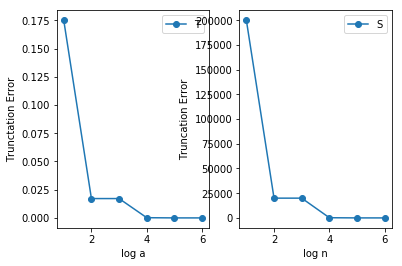

In [22]:
sizen=[1, 2 , 3, 4, 5, 6]
plt.subplot(1,2,1)
plt.plot(sizen, trunc_t_a, marker="o")
plt.xlabel('log a')
plt.ylabel('Trunctation Error')
plt.legend('Trapezoidal method')

plt.subplot(1,2,2)
plt.plot(sizen, trunc_t_n, marker="o")
plt.xlabel('log n')
plt.ylabel('Truncation Error')
plt.legend('Simpsons method') 
plt.savefig('difference.pdf', bbox_inches='tight')

### Other Cases

What if we do not know the true value of the integral? to ensure the convergence of the numerical algorithms we pick a small tolerance value $\epsilon$ and we check at every iteration $k = 1,2,...$ if $|I_k-I_{k-1}| < \epsilon$ holds

In [24]:
"""Define iterative trapezoidal"""
def trap(f,a,b,ep):
    n=1
    s0=0
    s1=1
    counter=0
    
    while abs(s1-s0) > ep:
        s0=s1
        s1=0
        h=(b-a)/n
        s1=0.5*(f(a)+f(b))*h
        for i in range (1,int(n)):
            s1=s1+h*f(a+i*h)
        counter = counter+1
        n=2*n
    return counter, s1

def trap2(f,a,b,ep):
    n=1
    s0=0
    s1=1
    counter=0
    
    while abs(s1-s0) > ep:
        s0=s1
        s1=0
        h=(b-a)/n
        s1=0.5*(f(a)+f(b))*h
        for i in range (1,int(n)):
            s1=s1+h*f(a+i*h)
        counter = counter+1
        n=2*n
    return s1

print(trap(g,-1e6,1e6,0.0001))
"""Define iterative simpsons"""        
def simp(f,a,b,ep):
    n=1
    s0=0
    s1=1
    counter=0
    
    while abs(s1-s0) > ep:
        s0=s1
        s1=0
        h=(b-a)/n
        s3=(f(a)+f(b))
        s5=0
        for i in range(1,n//2-1):
            s5=s5+f(a+2*i*h)
        s4=0
        for i in range(1,n//2):
            s4=s4+f(a+(2*i-1)*h)
        s1=h/3*(s3+4*s5+2*s4)
        counter=counter+1
        n=2*n
    return counter, s1

def simp2(f,a,b,ep):
    n=1
    s0=0
    s1=1
    counter=0
    
    while abs(s1-s0) > ep:
        s0 = s1
        s1 = 0
        h = (b-a)/n
        s3 = (f(a)+f(b))
        s5 = 0
        for i in range(1,n//2-1):
            s5 = s5 + f(a + 2*i*h)
        s4 = 0
        for i in range(1,n//2):
            s4 = s4 + f(a + (2*i-1)*h)
        s1 = h/3*(s3+4*s5+2*s4)
        counter = counter + 1
        n=2*n
    return s1
print(simp(g, -1e6, 1e6, 0.0001))

(21, 3.1415913857872506)
(22, 3.1415928924752854)


As an example consider the following function: $$h(x)=1+ e^{-x} \sin(8x^{2/3})$$
We use the trapezoidal rule and Simpson’s rule to approximate $\int_{0}^{2}h(x)dx$.

$\epsilon$ is set equal to $10^{-4}$.

In [25]:
def h(x):
    return 1 + exp(-x)*sin(8*(x**(2/3)))


print(simp(h,0,2,0.0001))
print(trap(h,0,2,0.0001))
print(trapezoidal(h,0,2,100000))
print(simpson(h,0,2,100000))


(17, 2.0161970009913657)
(11, 2.0162420114326878)
2.016279701339434
2.0162255190029454


# Heston Model

We can use the above methods to calculate the price of options. Below is an example of the Heston Model. 

For details of the model see

Mikhailov, Sergei and Nogel, Ulrich. “Heston’s stochastic volatility model: Implementation, calibration and some extensions” *Wilmott Journal*, 2004.

In [28]:

S=1
T=5
K=1
v=0.1
sigma=0.2
rho=-0.3
k=1
theta=0.1
r=0
lambd=0
u1=0.5
u2=-0.5

b1 =k +lambd-rho*sigma
b2 =k +lambd

a = k*theta

def get_d(rho,sigma,phi,b1,b2,u1,u2):
    
    d1 = cmath.sqrt( (1j*rho*sigma*phi - b1)**2 - sigma**2*(1j*2*u1*phi - phi**2) )
    d2 = cmath.sqrt( (1j*rho*sigma*phi - b2)**2 - sigma**2*(1j*2*u2*phi - phi**2) )
 
    return([d1,d2])

def get_g(rho,sigma,phi,b1,b2,u1,u2,d1,d2):

    g1 = (b1 - 1j*rho*sigma*phi + d1)/(b1 - 1j*rho*sigma*phi - d1)
    g2 = (b2 - 1j*rho*sigma*phi + d2)/(b2 - 1j*rho*sigma*phi - d2)
    
    return([g1,g2])

def get_D(rho,sigma,phi, b1,b2,u1,u2,d1,d2,g1,g2):
    T=5
    D1 = (b1 - 1j*rho*sigma*phi + d1)/sigma**2*((1 - cmath.exp(d1*T))/(1 - g1*cmath.exp(d1*T)))
    D2 = (b2 - 1j*rho*sigma*phi + d2)/sigma**2*((1 - cmath.exp(d2*T))/(1 - g2*cmath.exp(d2*T)))
    
    return([D1,D2])

In [29]:
def get_C(r, phi, T, a,sigma,b1,b2,rho,d1,d2,g1,g2):
    C1 = r*phi*1j*T + a/sigma**2 * ( (b1 - 1j*rho*sigma*phi + d1)*T - 2 * cmath.log((1 - g1*cmath.exp(d1*T))/(1-g1)))
    C2 = r*phi*1j*T + a/sigma**2 * ( (b2 - 1j*rho*sigma*phi + d2)*T - 2 * cmath.log((1 - g2*cmath.exp(d2*T))/(1-g2)))
    return([C1,C2])
    
def get_fi(r, phi, T, a, sigma,b1,b2,rho,d1,d2,g1,g2,C1,C2,D1,D2,v,S):
    fi1 = cmath.exp(C1 + D1*v + 1j*phi*log(S))
    fi2 = cmath.exp(C2 + D2*v+ 1j*phi*log(S))
    return([fi1,fi2])

Integrals

In [30]:
def four1(phi):
    [d1,d2] = get_d(rho,sigma,phi,b1,b2,u1,u2)
    [g1,g2] = get_g(rho,sigma,phi,b1,b2,u1,u2,d1,d2)
    [D1,D2] = get_D(rho,sigma,phi,b1,b2,u1,u2,d1,d2,g1,g2)
    [C1,C2] = get_C(r, phi, T, a, sigma,b1,b2,rho,d1,d2,g1,g2)
    [fi1,fi2] = get_fi(r, phi, T, a, sigma,b1,b2,rho,d1,d2,g1,g2,C1,C2,D1,D2,v,S)
    val1 = cmath.exp(-1j*phi*log(K))*fi1/(1j*phi)
    return(val1.real)

In [31]:
def four2(phi):
    [d1,d2] = get_d(rho,sigma,phi,b1,b2,u1,u2)
    [g1,g2] = get_g(rho,sigma,phi,b1,b2,u1,u2,d1,d2)
    [D1,D2] = get_D(rho,sigma,phi,b1,b2,u1,u2,d1,d2,g1,g2)
    [C1,C2] = get_C(r, phi, T, a, sigma,b1,b2,rho,d1,d2,g1,g2)
    [fi1,fi2] = get_fi(r, phi, T, a, sigma,b1,b2,rho,d1,d2,g1,g2,C1,C2,D1,D2,v,S)
    val2 = cmath.exp(-1j*phi*log(K))*fi2/(1j*phi)
    return(val2.real)

Probabilities

In [32]:
def prob(four1,four2):
#    prob1=1/2+(1/pi)*trapezoidal(four1,0.01,600,100000)
#    prob2=1/2+(1/pi)*trapezoidal(four2,0.01,600,100000)
    prob1=1/2+1/pi*simp2(four1, 0.1,500, 0.0001)
    prob2=1/2+1/pi*simp2(four2, 0.1,500, 0.0001)
    return ([prob1,prob2])


### Call Price

In [33]:
def heston_call (S, K, v,r,T):
    [prob1,prob2]= prob(four1, four2)
    return S*prob1-K*exp(-r*T)*prob2

In [44]:
print(heston_call(1,0.5,0.1,0,5))
print(heston_call(1,0.75,0.1,0,5)) 
print(heston_call(1,1,0.1,0,5))
print(heston_call(1,1.25,0.1,0,5))
print(heston_call(1,1.5,0.1,0,5))
print(heston_call(1,1.70,0.1,0,5))


TypeError: get_D() missing 1 required positional argument: 'g2'